In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.7.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images, test_labels) = fashion_mnist.load_data()

While building a neural network we should train our model on a large chunk of
our data and keep the rest of the data for testing our model.

Usually 70 : 30 but for large complicated dataa it may also be 98 : 2...

In [3]:
# model = keras.Sequential([
#         keras.layers.Dense(1,input_shape=(28,28)), # converts the 28x28 square into
#                                                  # simple linear array
#         keras.layers.Dense(128,activation = tf.nn.relu),
#         keras.layers.Dense(10,activation = "softmax")
# ])
# interesting stuff happens in the hidden layer
# has 128 neurons in it that can be assumed as varaible of a function such as 
# below :- 
# y = W1x1 + W2x2....+W128x128 == 9

Label: 9

Image Pixel Array: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

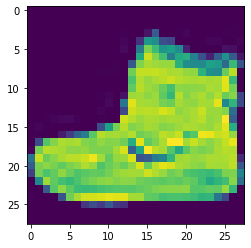

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

index = 0
# set number of characters per row when printing 
np.set_printoptions(linewidth = 320)

#Print the labels and the image

print(f'Label: {train_labels[index]}')
print(f'\nImage Pixel Array: \n {train_images[index]}')

plt.imshow(train_images[index])



While training a neural network especially
in image processing, for various reasons it will usually learn better if we scale all values to between 0 and 1. In python we can normalize without looping.

In [5]:
# Normalizing -- Unity based Normalization
train_images = train_images/255.0
test_images = test_images/255.0

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(128,activation= tf.nn.softmax)])

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

ReLU effectively means:

if x > 0: 
  return x

else: 
  return 0
In other words, it it only passes values 0 or greater to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth

In [7]:
# Declaring the inputs and converting them to tensors 
inputs = np.array([1.0,3.0,4.0,2.0])
inputs = tf.convert_to_tensor(inputs)
# inputs = tf.constant(inputs) # this and above have no difference ??
print(f'input to softmax function: {inputs.numpy()}')

# feeding the inputs to a softmax actiavation function
outputs = tf.nn.softmax(inputs)
print(f'output fo the softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value 
prediction = np.argmax(outputs)
print (f'class with highest probability: {prediction}')


input to softmax function: [1. 3. 4. 2.]
output fo the softmax function: [0.0320586  0.23688282 0.64391426 0.08714432]
sum of outputs: 1.0
class with highest probability: 2


In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5309 - accuracy: 0.8194
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3884 - accuracy: 0.8603
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3476 - accuracy: 0.8742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3218 - accuracy: 0.8826
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.8890


In [9]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3664 - accuracy: 0.8694


[0.36644652485847473, 0.8694000244140625]

# Exploration Exercises

### Exercise 1:

In [10]:
classification = model.predict(test_images)
print (classification[0])

[4.70472105e-06 2.00387014e-08 1.01671753e-06 3.32340981e-08 1.33265598e-06 9.76336561e-03 3.36536177e-05 1.09858448e-02 5.55798651e-05 9.79154468e-01 4.45271885e-13 4.28545518e-13 5.02243267e-13 2.22409629e-13 4.42461345e-12 8.87565282e-12 1.10493776e-12 5.10637214e-13 5.70280720e-14 5.05962590e-12 7.57262579e-13
 1.11792043e-11 2.96864226e-12 4.21091374e-12 2.29267668e-12 9.96823934e-13 7.48991841e-12 1.33948137e-12 1.35397899e-12 6.01489507e-13 2.10094290e-12 1.97947526e-11 4.26048563e-12 1.87682470e-13 3.61359163e-13 7.05787100e-13 3.30577498e-13 2.75831051e-12 5.57036795e-12 3.51123080e-12 4.18155614e-12 3.12804253e-13
 4.59513287e-13 1.67338826e-13 2.50859793e-12 1.57277739e-12 6.32127543e-14 1.15496501e-12 3.21446076e-13 1.82403016e-11 3.02047829e-13 2.86666686e-13 4.88005253e-12 1.43643994e-12 1.25429582e-12 7.66636266e-13 4.85698287e-13 6.98362809e-14 6.96035306e-15 2.59535611e-13 2.48259773e-13 4.78202926e-13 1.39026572e-12
 3.66252520e-13 1.23990385e-14 2.06605932e-13 1.3168

In [11]:
print(test_labels[0])

9


The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities. For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.



Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot




In [12]:
mnist = tf.keras.datasets.fashion_mnist

(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()

training_images = training_images/ 255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation = tf.nn.softmax)])
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy")

model.fit(training_images,training_labels,epochs = 5)

model.evaluate(testing_images,testing_labels)

classification = model.predict(testing_images)

print(classification[0])

print(test_labels[0])


Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4721
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3571
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3205
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2967
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 67.2830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


#### What would happen if you remove the Flatten() layer. Why do you think that's the case?
You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

#### Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

We get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.



#### Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.



If we train our model for a significantly longer number of epochs. One of the dire side effects we may encounter is overfitting the model. An overfitted model would see too good to be true. It would work marvellously on our training dataset but upon model evaluation in testing case we would see a very poor performance. This is a sign of "Overfitting".

In [13]:
mnist = tf.keras.datasets.fashion_mnist

(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()

# training_images = training_images/ 255.0
# test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation = tf.nn.softmax)])
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy")

model.fit(training_images,training_labels,epochs = 5)

model.evaluate(testing_images,testing_labels)

classification = model.predict(testing_images)

print(classification[0])

print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 4.7508
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5251
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5113
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4946
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.5839
[4.1170426e-15 2.8364510e-15 2.8173149e-19 1.1015339e-14 5.5206898e-18 2.2126460e-02 3.0195544e-18 3.8954716e-03 1.3268164e-11 9.7397804e-01]
9


In [14]:
## Using callback class
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    '''
    Halts the training at 60 percent accuracy so that we dont have find the 
    optimal value ourselves.

    Args :- 
    epochs (integer) - index of epochs is required (though unused in def)
    logs(dict) - metric results from the training epochs
    '''
    # Check Accuracy
    if (logs.get("loss") < 0.6):
      #stop if threshold is met
      print ("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True 

#Instantiate class
callbacks = myCallback()


In [15]:
training_images = training_images/ 255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation = tf.nn.softmax)])
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy")

In [16]:
model.fit(training_images,training_labels,epochs = 5,callbacks=[callbacks])
# We have setup the callback on epoch end even though our loss is less than 40 
# percent by the 2nd step. and it is a good practice to do it as such..

Epoch 1/5
1868/1875 [============================>.] - ETA: 0s - loss: 0.4720
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4713
